In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
def calculate_variogram_for_ts(ts, n_lags=10):
        """
        Calculate the variogram for a time series.

        Parameters:
        - ts: Time series
        - n_lags: Number of lags to calculate the variogram for

        Returns:
        Vector of the semi-variance for each lag
        """
        variances = np.zeros(n_lags)
        for i in range(n_lags):
                variances[i] = 0.5 * np.mean((ts[(i+1):] - ts[:-(i+1)]) ** 2)
        return variances

<Axes: >

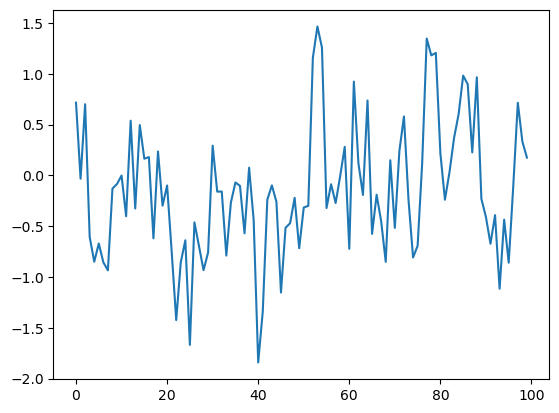

In [22]:
noise = 0.5
weights = np.array([0.5, 0.2, -0.05])
ar_p = len(weights)
t = np.zeros(100)
t[:ar_p] = np.random.normal(size=ar_p)
for i in range(ar_p, 100):
    t[i]= weights @ t[i-ar_p:i][::-1] + np.random.normal() * noise
t = pd.Series(t)
t.plot()

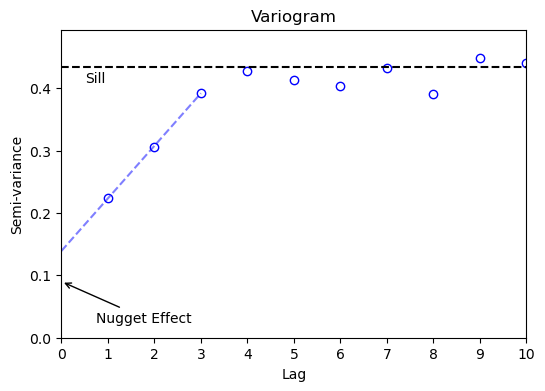

In [26]:
variogram = calculate_variogram_for_ts(t.values, n_lags=11)
v = pd.Series(variogram).shift(1).fillna(0)
fcst_x = np.arange(4)
coeffs = np.polyfit(fcst_x[1:], v.values[1:4], 1)
fcst_y = lambda fcst_x: coeffs[0] * fcst_x + coeffs[1]

fig, ax = plt.subplots(figsize=(6, 4))
ax = v[1:].plot(marker='o', linestyle='', markerfacecolor='none', markeredgecolor='blue')
ax.plot(fcst_x, fcst_y(fcst_x), color='blue', ls='--', alpha=0.5)
ax.set(xlabel='Lag', ylabel='Semi-variance', title='Variogram',
       xlim=(0, max(v.index)), ylim=(0, max(v.values) * 1.1))
ax.annotate('Nugget Effect', xy=(0.001, 0.09), xytext=(0.75, 0.025),
            arrowprops=dict(arrowstyle='->', color='black'))
ax.text(0.5, 0.41, 'Sill', color='black')
ax.axhline(np.var(t), color='black', linestyle='--')
ax.set_xticks(range(0, 11, 1))
plt.show()